In [22]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:


test_size = 0.20
seed = 7

array = data.values
X = array[:,0:11]
y = array[:,11]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=test_size,
    shuffle=True,
    random_state=seed,
    stratify=y
)

scoring = 'accuracy'
partitions_num = 10
kfold = StratifiedKFold(n_splits=partitions_num, shuffle=True, random_state=seed)

KNN: 0.502768 (0.043741)
CART: 0.589505 (0.028259)
NB: 0.559787 (0.037451)
SVM: 0.494131 (0.042979)


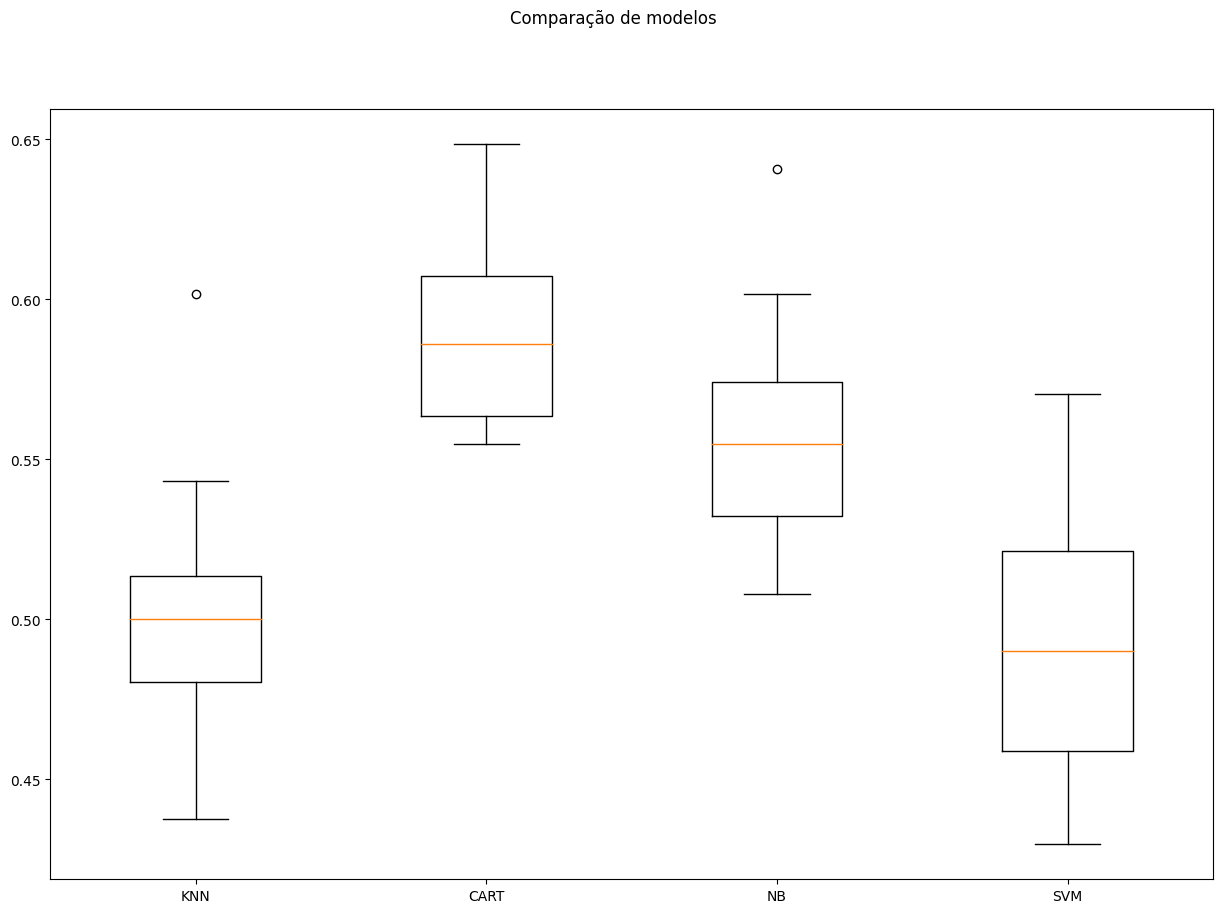

In [6]:
np.random.seed(7)
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação de modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


KNN-orig: 0.502768 (0.043741)
CART-orig: 0.589505 (0.028259)
NB-orig: 0.559787 (0.037451)
SVM-orig: 0.494131 (0.042979)
KNN-padr: 0.585599 (0.030649)
CART-padr: 0.588724 (0.027360)
NB-padr: 0.556662 (0.042319)
SVM-padr: 0.616843 (0.031672)
KNN-norm: 0.577793 (0.032604)
CART-norm: 0.591837 (0.027521)
NB-norm: 0.556662 (0.042319)
SVM-norm: 0.612986 (0.032914)


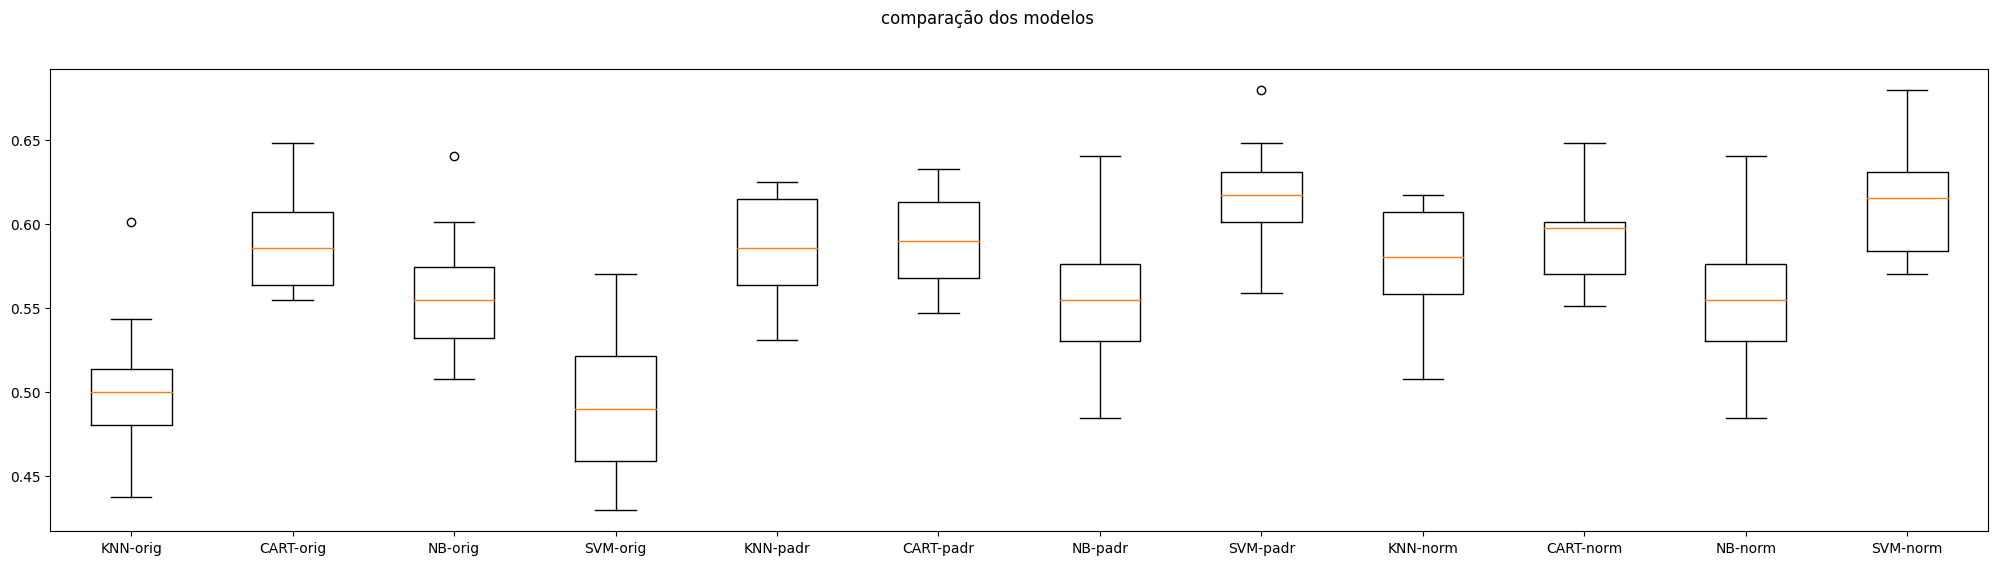

In [7]:
np.random.seed(7)
pipelines = []
results = []
names = []

knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
nb = ('NB', GaussianNB())
svm = ('SVM', SVC())

standart_scaler = ('StandartScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


### Pipeline original
pipelines.append(("KNN-orig", Pipeline([knn])))
pipelines.append(("CART-orig", Pipeline([cart])))
pipelines.append(("NB-orig", Pipeline([nb])))
pipelines.append(("SVM-orig", Pipeline([svm])))

### Pipeline padronizado
pipelines.append(("KNN-padr", Pipeline([standart_scaler, knn])))
pipelines.append(("CART-padr", Pipeline([standart_scaler,cart])))
pipelines.append(("NB-padr", Pipeline([standart_scaler,nb])))
pipelines.append(("SVM-padr", Pipeline([standart_scaler,svm])))


### Pipeline normalizado
pipelines.append(("KNN-norm", Pipeline([min_max_scaler, knn])))
pipelines.append(("CART-norm", Pipeline([min_max_scaler,cart])))
pipelines.append(("NB-norm", Pipeline([min_max_scaler,nb])))
pipelines.append(("SVM-norm", Pipeline([min_max_scaler,svm])))


for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

fig = plt.figure(figsize=(25,6))
fig.suptitle('comparação dos modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [8]:
np.random.seed(7)

knn = ('KNN', KNeighborsClassifier())
standart_scaler = ('StandartScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []

pipelines.append(("KNN-orig", Pipeline(steps=[knn])))
pipelines.append(("KNN-padr", Pipeline(steps=[standart_scaler, knn])))
pipelines.append(("KNN-norm", Pipeline(steps=[min_max_scaler, knn])))

param_grid = {'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              'KNN__metric': ["euclidean", "manhattan", "minkowski"]}

for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  grid_result = grid.fit(X_train, y_train)
  print("%s: %f com parâmetros %s" % (name, grid_result.best_score_, grid_result.best_params_))


KNN-orig: 0.572336 com parâmetros {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
KNN-padr: 0.625498 com parâmetros {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
KNN-norm: 0.623917 com parâmetros {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


In [9]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsClassifier(metric='euclidean', n_neighbors=1)
model.fit(rescaledX, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [10]:
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))


0.634375


In [11]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model.fit(rescaledX, y)

# Novos dados - não sabemos a classe!
data = {'fixed acidity': [7.4, 7.8, 7.8,],
        'volatile acidity': [0.7, 0.88, 0.76],
        'citric acid': [0.0 ,0.0 , 0.04],
        'residual sugar': [1.9, 2.6, 2.3],
        'chlorides': [0.076, 0.098, 0.092],
        'free sulfur dioxide': [11.0, 25.0, 15.0],
        'total sulfur dioxide': [34.0,67.0, 54.0],
        'density': [0.9978, 0.9968, 0.997],
        'pH': [3.51, 3.2,3.26],
        'sulphates': [0.56, 0.68, 0.65],
        'alcohol': [9.4, 9.8 ,9.8]}

atributos = ['fixed acidity',
             'volatile acidity',
             'citric acid',
             'residual sugar',
             'chlorides',
             'free sulfur dioxide',
             'total sulfur dioxide',
             'density',
             'pH',
             'sulphates',
             'alcohol']

entrada = pd.DataFrame(data, columns=atributos)
array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711]]


In [12]:
saidas = model.predict(rescaledEntradaX)
print(saidas)

[5. 5. 5.]


In [19]:
### dump do modelo
model_file_name = '/content/drive/MyDrive/data/wine-quality-model.pkl'
model_file = open(model_file_name, 'wb')
pickle.dump(model, model_file)
model_file.close()


In [20]:
# dump do scaler
scaler_file_name = '/content/drive/MyDrive/data/wine-quality-scaler.pkl'
scaler_file = open(scaler_file_name, 'wb')
pickle.dump(scaler, scaler_file)
scaler_file.close()

In [21]:
# importantdo o modelo e scaler para teste
scaler_file = open(scaler_file_name, 'rb')
model_file = open(model_file_name, 'rb')
scaler = pickle.load(scaler_file)
model = pickle.load(model_file)

input = scaler.transform(X_entrada)
saidas = model.predict(input)
model_file.close()
scaler_file.close()

print(saidas)



[5. 5. 5.]
